<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/MejorAgrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True) #  force_remount=True , pide eso no sé porqué

Mounted at /content/drive


In [177]:
import pandas as pd
from pandas.core.frame import DataFrame

import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import plotly.express as px
from   plotly.subplots import make_subplots
import seaborn as sns

import missingno as msno
import numpy as np

sns.set_theme()

In [178]:
# LIBRERIAS MACHINE LEARNING

from sklearn                 import metrics                # Metricas (Matriz de Confunsión)

from sklearn.linear_model    import LogisticRegression     # Regresión Logistica
from sklearn.linear_model    import LinearRegression       # Regresión Lineal

from sklearn.neighbors       import KNeighborsClassifier   # Knn como clasificador
from sklearn.neighbors       import KNeighborsRegressor    # Knn como Regresor

from sklearn.tree            import DecisionTreeClassifier # Arboles de Decisión Clasificador
from sklearn.tree            import DecisionTreeRegressor  # Arboles de Decisión Regresor

from sklearn.ensemble        import BaggingClassifier      # Bagging and pasting Classifier
from sklearn.ensemble        import BaggingRegressor       # Bagging and pasting Regressor 

from sklearn.ensemble        import RandomForestClassifier # Bosques aleatorios (Random Forests)
from sklearn.ensemble        import RandomForestRegressor  # Bosques aleatorios (Random Forests) Regres

from sklearn.model_selection import GridSearchCV           # Grid Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV     # Para Pruebas Random

from sklearn.model_selection import train_test_split       # Para dividir las pruebas

from sklearn                 import tree                   # Grficar Arboles

# PARA OBTENER METRICAS

from sklearn.metrics         import mean_absolute_error    # Error absoluto medio (MAE)
from sklearn.metrics         import mean_squared_error     # Error cuadrático medio (MSE) y Raíz del error cuadrático medio (RMSE)
from sklearn.metrics         import r2_score               # Determinar el r2 score

#Transformacion de Datos scalar, normalizar y standarizacion OneHotencoding LabelEncoder 

from sklearn.preprocessing    import LabelEncoder          # Definir clasificación de una columna Texto Variables Categoricas
from sklearn.preprocessing    import StandardScaler        # Standarización de Datos
from sklearn.preprocessing    import OneHotEncoder         # OneHotEncoder 

from sklearn.linear_model     import Ridge
from sklearn.metrics          import roc_auc_score, plot_roc_curve ,accuracy_score

from sklearn.cluster          import KMeans


In [179]:
def CargaDatos(filename):
  
  extension = filename[filename.find('.')+1:]
  path = "/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/"

  filename = path + filename
  if extension.lower() == 'csv':
      df = pd.read_csv(filename)   # csv
  
  if extension.lower() == 'xlsx':
      df = pd.read_excel(filename) # Excel

  return df


In [180]:
filename = 'cust_seg.csv'    


df = CargaDatos(filename)

df.drop(columns='Unnamed: 0',inplace=True)
df.set_index('Customer Id', inplace = True)

df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


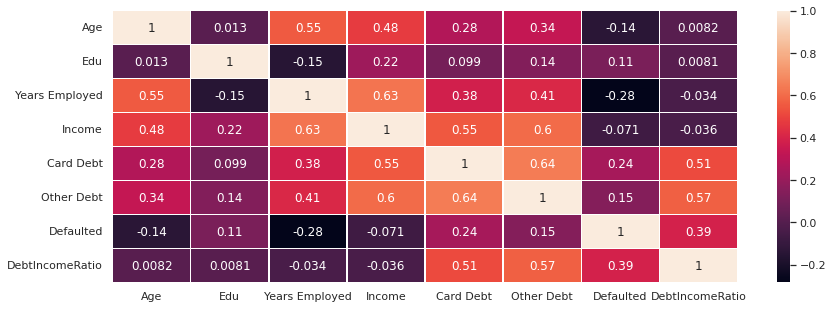

In [181]:
 f, ax = plt.subplots(figsize=(14, 5))
 correlation_mat = df.corr()
 sns.heatmap(correlation_mat, annot = True , linewidths=.5, ax=ax );

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [183]:
sortby="Age"
df.corr()[sortby].sort_values(ascending=False)

Age                1.000000
Years Employed     0.554241
Income             0.476218
Other Debt         0.337839
Card Debt          0.278912
Edu                0.012983
DebtIncomeRatio    0.008240
Defaulted         -0.137657
Name: Age, dtype: float64

In [184]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

# **Se dejan en cero los valor NaN del campo Defaulted**

In [185]:
df.fillna(0 , inplace = True)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,0.0,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


In [186]:
sortby="Defaulted"
df.corr()[sortby].sort_values(ascending=False)

Defaulted          1.000000
DebtIncomeRatio    0.355378
Card Debt          0.208829
Other Debt         0.120902
Edu                0.107925
Income            -0.074274
Age               -0.131556
Years Employed    -0.258410
Name: Defaulted, dtype: float64

In [187]:
df.groupby(['Defaulted']).count()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Defaulted,,,,,,,
0.0,667,667,667,667,667,667,667
1.0,183,183,183,183,183,183,183


In [188]:
scaler = StandardScaler()

# Ajustar y transformar datos
df_paso = scaler.fit_transform(df)
df = pd.DataFrame(df_paso , columns =df.columns)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507
...,...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.523797,-0.502070
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.523797,-0.472288
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,1.909138,3.458923
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-0.523797,-1.082817


In [189]:
X = df[['Age','Edu','Years Employed','Income','Other Debt','DebtIncomeRatio','Defaulted']]

In [190]:
X

,Age,Edu,Years Employed,Income,Other Debt,DebtIncomeRatio,Defaulted
0,0.742915,0.312122,-0.378790,-0.718459,-0.590489,-0.576525,-0.523797
1,1.489490,-0.766349,2.573721,1.384325,1.512962,0.391387,-0.523797
2,-0.252518,0.312122,0.211712,0.268032,0.801704,1.597554,1.909138
3,-0.750235,0.312122,-0.674041,-0.718459,-0.754467,-0.576525,-0.523797
4,1.489490,-0.766349,3.311849,5.356249,1.716094,-0.442507,-0.523797
...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.547213,-0.502070,-0.523797
846,-0.874664,0.312122,-0.231164,-0.329054,-0.311403,-0.472288,-0.523797
847,-1.247951,2.469066,-1.264543,-0.744419,0.038633,3.458923,1.909138
848,-0.376947,-0.766349,0.506963,-0.484816,-0.701476,-1.082817,-0.523797


# **Se grafican los datos**

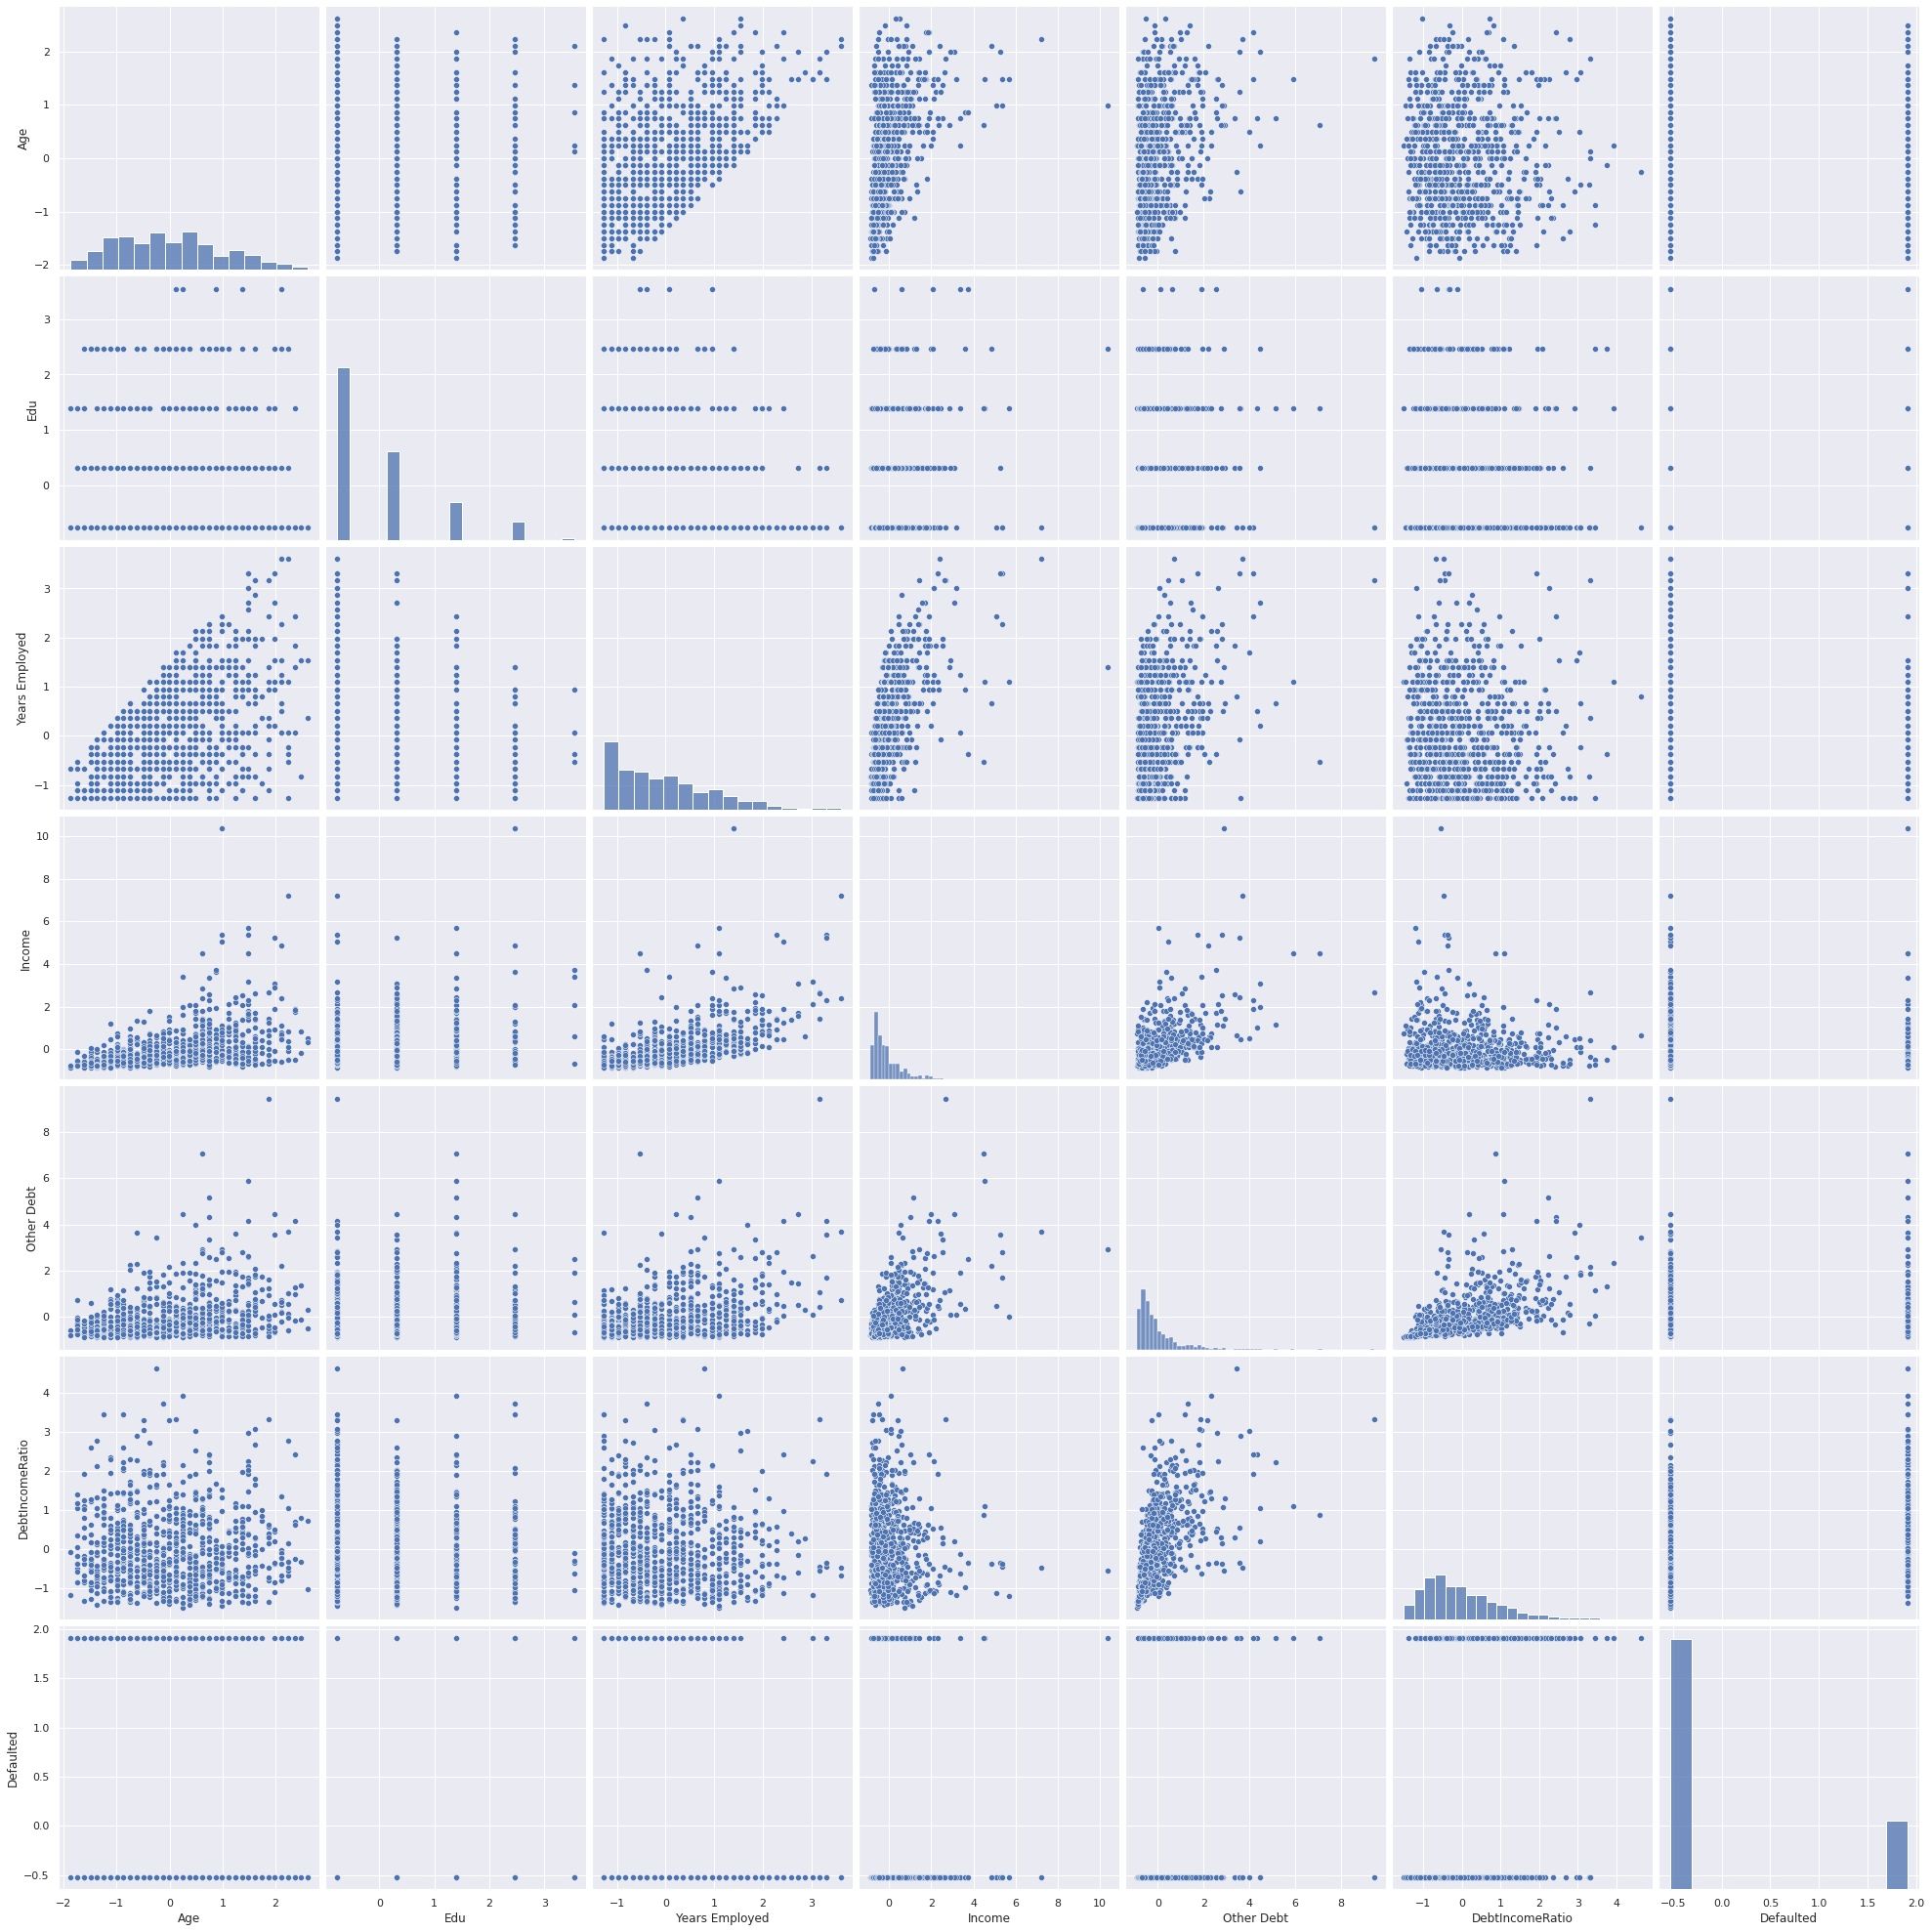

In [191]:
sns.pairplot(df.dropna(),  hue_order='Age', height=4,vars=['Age','Edu','Years Employed','Income', 'Other Debt','DebtIncomeRatio','Defaulted'],kind='scatter');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

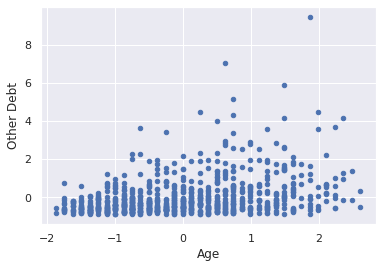

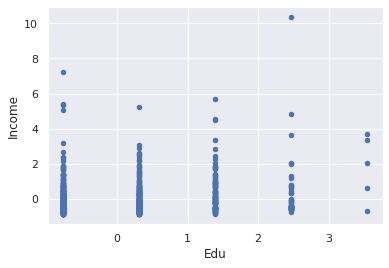

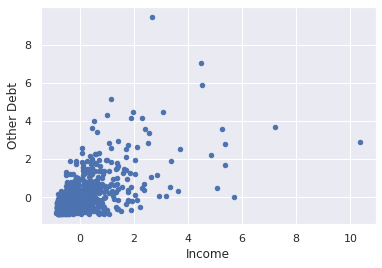

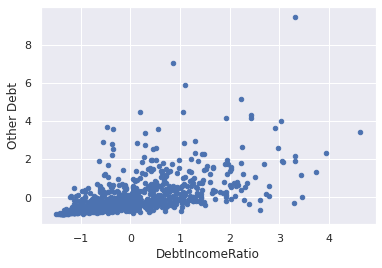

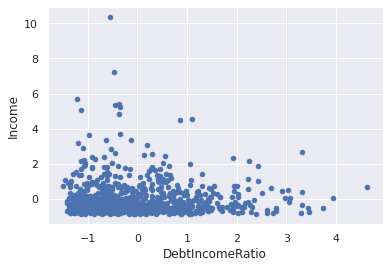

In [192]:
df.plot.scatter(x='Age', y='Other Debt');
df.plot.scatter(x='Edu', y='Income');
df.plot.scatter(x='Income', y='Other Debt');
df.plot.scatter(x='DebtIncomeRatio', y='Other Debt');
df.plot.scatter(x='DebtIncomeRatio', y='Income');

In [193]:
#df.loc[:,:].plot.scatter();

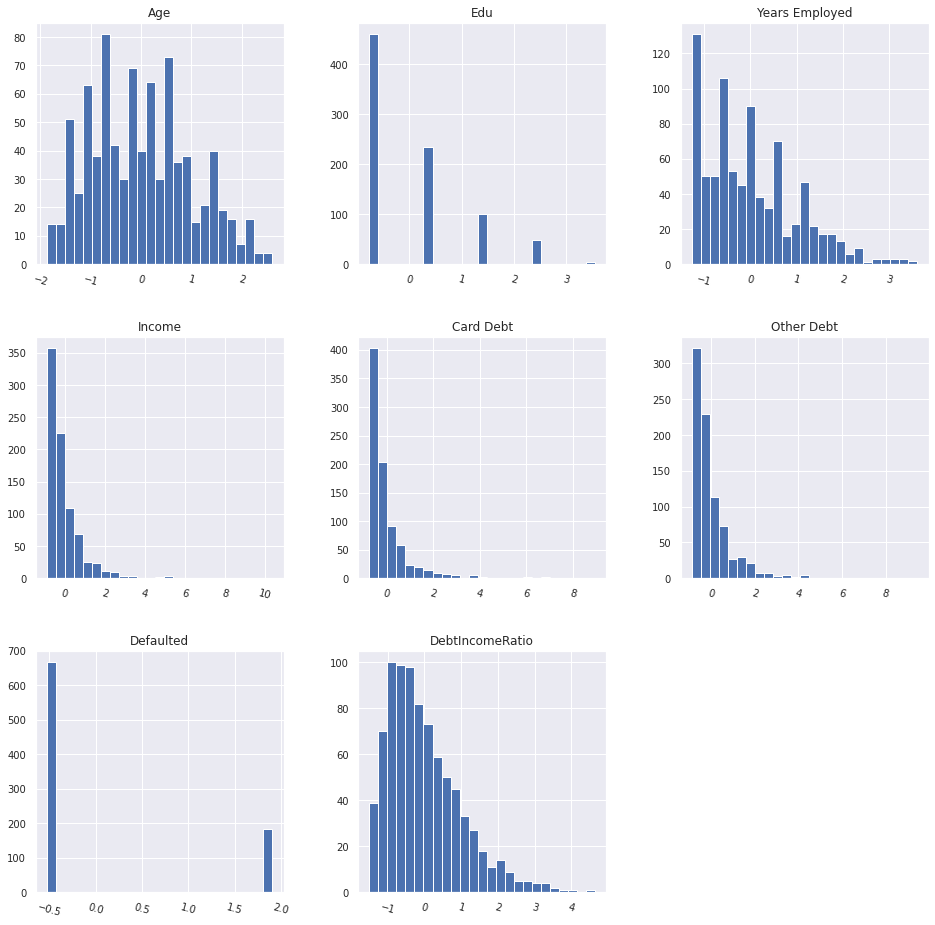

In [194]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

**Evaluando el Mejor k**

 K = 2 score = 4576.824309525201 Score Anterior = 5950.000000000001 dif = 1373.1756904748 Anterior 

 K = 3 score = 3733.6102631764325 Score Anterior = 4576.824309525201 dif = 843.2140463487685 Anterior 

 K = 4 score = 3285.391026870191 Score Anterior = 3733.6102631764325 dif = 448.2192363062413 Anterior 

 K = 5 score = 2935.548137647033 Score Anterior = 3285.391026870191 dif = 349.8428892231582 Anterior 

 K = 6 score = 2653.6372813540843 Score Anterior = 2935.548137647033 dif = 281.91085629294867 Anterior 

 K = 7 score = 2465.502208950522 Score Anterior = 2653.6372813540843 dif = 188.1350724035624 Anterior 

 K = 8 score = 2284.86968037867 Score Anterior = 2465.502208950522 dif = 180.6325285718517 Anterior 

 K = 9 score = 2176.06832992252 Score Anterior = 2284.86968037867 dif = 108.80135045614998 Anterior 

 K = 10 score = 2062.928971223437 Score Anterior = 2176.06832992252 dif = 113.139358699083 Anterior 

 K = 11 score = 1950.3945066829733 Score Anterior = 2062.928971223437 dif

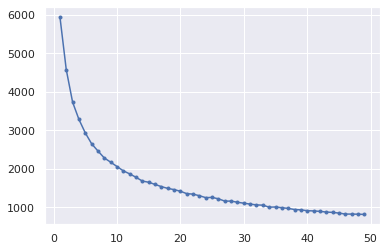

In [195]:
scorel   =  []
k_mejor =  0
diff=0

k_clusters = range(1,50) # Este range va de 1 a 20
for k in k_clusters:
    
    kmeans = KMeans(n_clusters=k)
    
    kmeans.fit(X)
    score = -(kmeans.score(X))
    scorel.append(score)

    #print(f"k {k}  score {score} \n")

    if k>1:
       print( f" K = {k} score = {score} Score Anterior = {scorel[k-2]} dif = { abs(abs(score) - abs(scorel[k-2]))} Anterior \n")
       resta = abs(abs(score) - abs(scorel[k-2]))
       #print(f"resta {resta}")
       if resta > diff:
         k_mejor = k
         diff = resta

    else:   
       diff = 0

    
#print(f"k_mejor {k_mejor}  diff {diff} \n")



plt.plot(k_clusters, scorel,'b.-')

**Con el mejor usamos KMeans, el mejor es k = 3, según lo que se visualiza.**

In [196]:
k = 3  # Este es el número de agrupaciones (nuestro supuesto)

kmeans = KMeans(n_clusters=k)

# OJO, no es que nos falte la división en training y test. NO es necesaria en este caso.

kmeans.fit(X)

y_pred = kmeans.predict(X)


In [197]:
#y_pred

In [198]:
np.unique(y_pred)

array([0, 1, 2], dtype=int32)

In [199]:
df['cluster'] = y_pred
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525,0
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387,1
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554,2
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525,0
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507,1
...,...,...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.523797,-0.502070,0
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.523797,-0.472288,0
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,1.909138,3.458923,2
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-0.523797,-1.082817,0


In [200]:
df['cluster'].value_counts()

0    528
2    176
1    146
Name: cluster, dtype: int64

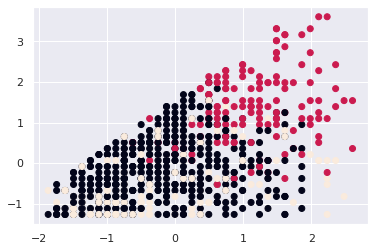

In [201]:
plt.scatter(df['Age'], df['Years Employed'], c = df['cluster']);

In [ ]:
sns.pairplot(df.dropna(), hue='cluster', hue_order='Age', height=4,vars=['Age','Edu','Years Employed','Income', 'Other Debt','DebtIncomeRatio','Defaulted'],kind='scatter');

# **Agrupamiento jerárquico**

In [ ]:
df.drop(columns = 'cluster' , inplace=True)
df

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5)
hc.fit(df)

In [ ]:
# Visualizar dendrograma
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.xlabel('Data Points');

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5)
hc.fit(df)
df['cluster'] = hc.labels_
df

In [ ]:
df['cluster'].value_counts()

In [ ]:
plt.scatter(df['Age'], df['Years Employed'], c = df['cluster']);

In [ ]:
sns.pairplot(df.dropna(), hue='cluster', hue_order='Age', height=4,vars=['Age','Edu','Years Employed','Income', 'Other Debt','DebtIncomeRatio','Defaulted'],kind='scatter');

# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
df.drop(columns = 'cluster' , inplace=True)
df

In [ ]:
dbs = DBSCAN(eps = 0.5, min_samples = 8).fit(df)
df['cluster'] = dbs.labels_
df

In [ ]:
df['cluster'].value_counts()

In [ ]:
plt.scatter(df['Age'], df['Years Employed'], c = df['cluster']);

In [ ]:
sns.pairplot(df.dropna(), hue='cluster', hue_order='Age', height=4,vars=['Age','Edu','Years Employed','Income', 'Other Debt','DebtIncomeRatio','Defaulted'],kind='scatter');

# **Parte 2**

¿Qué algoritmo de agrupación en clústeres es mejor para estos datos y por qué?

